# Preparation



### Import Lib

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import io
from sklearn.ensemble import RandomForestClassifier
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Dataset

In [ ]:
project_path = "/content/drive/MyDrive/ComBio"
file_path = f"{project_path}/Dataset/cleaned_dataset.csv"

df = pd.read_csv(file_path)
df = df.drop(columns=["dataset"])
palette = sns.color_palette("Set3", n_colors=10)
col_var = "#fb8072"

# EDA

### Dataset Structure

In [ ]:
df.info(show_counts=True, memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3687 non-null   int64  
 1   gender               3687 non-null   int64  
 2   race_ethnicity       3687 non-null   int64  
 3   education_level      3687 non-null   int64  
 4   income_ratio         3687 non-null   float64
 5   marital_status       3687 non-null   int64  
 6   jaundice_history     3687 non-null   int64  
 7   receive_transfusion  3687 non-null   int64  
 8   liver_condition      3687 non-null   int64  
 9   injectable_drug_use  3687 non-null   int64  
 10  drug_use             3687 non-null   int64  
 11  alcohol_consumption  3687 non-null   int64  
 12  alt                  3687 non-null   float64
 13  albumin              3687 non-null   float64
 14  alp                  3687 non-null   float64
 15  ast                  3687 non-null   f

In [ ]:
df.head()

,age,gender,race_ethnicity,education_level,income_ratio,marital_status,jaundice_history,receive_transfusion,liver_condition,injectable_drug_use,...,glucose,total_bilirubin,total_calcium,total_protein,triglycerides,uric_acid,ldh,globulin,osmolality,hcv_status
0,45,2,4,4,1.99,1,2,2,2,2,...,108.0,0.3,9.2,7.1,165.0,5.2,122.0,3.0,276.0,0
1,25,1,3,5,3.00,5,2,2,2,2,...,95.0,0.7,10.0,7.2,48.0,6.9,110.0,2.3,278.0,0
2,68,2,4,4,1.84,1,2,2,2,2,...,87.0,0.6,9.5,6.6,56.0,5.1,121.0,2.7,284.0,1
3,64,2,2,2,0.75,1,2,2,2,2,...,117.0,0.6,10.2,7.7,191.0,6.0,159.0,3.2,281.0,0
4,36,2,1,3,2.88,1,2,2,2,2,...,96.0,0.4,8.8,7.6,106.0,3.9,90.0,3.6,278.0,0


### Check Missing Value

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
race_ethnicity,0
education_level,0
income_ratio,0
marital_status,0
jaundice_history,0
receive_transfusion,0
liver_condition,0
injectable_drug_use,0


### Descriptive statistics

In [ ]:
num_columns = ['age', 'income_ratio', 'alt', 'albumin', 'alp', 'ast', 'bun', 'cholesterol', 'cpk', 'creatinine', 'ggt', 'glucose', 'total_bilirubin', 'total_calcium', 'total_protein', 'triglycerides', 'uric_acid', 'ldh', 'globulin', 'osmolality']
df_num = df[num_columns]

cat_columns = ['gender', 'race_ethnicity', 'education_level', 'marital_status', 'jaundice_history',
               'receive_transfusion', 'liver_condition', 'injectable_drug_use', 'drug_use', 'alcohol_consumption', 'hcv_status']

df_cat = df[cat_columns].astype("category")

df_cat["gender"] = df_cat["gender"].replace({1: "Male", 2: "Female"})
df_cat["race_ethnicity"] = df_cat["race_ethnicity"].replace({
    1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White",
    4: "Non-Hispanic Black", 5: "Other Race"
})
df_cat["education_level"] = df_cat["education_level"].replace({
    1: "<9th grade", 2: "9–11th grade", 3: "High School Grad/GED",
    4: "Some College/AA degree", 5: "College Graduate or above"
})
df_cat["marital_status"] = df_cat["marital_status"].replace({
    1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never Married", 6: "Living with Partner"
})
df_cat["jaundice_history"] = df_cat["jaundice_history"].replace({1: "Yes", 2: "No"})
df_cat["receive_transfusion"] = df_cat["receive_transfusion"].replace({1: "Yes", 2: "No"})
df_cat["liver_condition"] = df_cat["liver_condition"].replace({1: "Yes", 2: "No"})
df_cat["injectable_drug_use"] = df_cat["injectable_drug_use"].replace({1: "Yes", 2: "No"})
df_cat["drug_use"] = df_cat["drug_use"].replace({1: "Yes", 2: "No"})
df_cat["alcohol_consumption"] = df_cat["alcohol_consumption"].replace({1: "Yes", 2: "No"})
df_cat["hcv_status"] = df_cat["hcv_status"].replace({0: "No", 1: "Yes"})


In [ ]:
df_num.describe()

,age,income_ratio,alt,albumin,alp,ast,bun,cholesterol,cpk,creatinine,ggt,glucose,total_bilirubin,total_calcium,total_protein,triglycerides,uric_acid,ldh,globulin,osmolality
count,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000
mean,47.883374,2.119103,41.212534,4.170759,72.653025,40.115306,12.842287,185.819651,158.028272,0.894894,59.128555,102.021499,0.660570,9.365940,7.277492,145.270817,5.539806,134.310434,3.106806,277.606450
std,12.994196,1.468853,41.688210,0.376380,24.656758,33.244511,5.019163,38.902636,186.596632,0.450313,97.747480,36.287324,0.334053,0.351551,0.503709,115.839169,1.310586,30.658242,0.569746,4.539544
min,18.000000,0.010000,6.000000,2.100000,14.000000,8.000000,1.000000,78.000000,17.000000,0.330000,5.000000,31.000000,0.010000,7.200000,5.380000,26.000000,0.700000,52.000000,1.700000,259.000000
25%,39.000000,1.000000,19.000000,3.951643,57.000000,21.000000,9.893917,159.000000,88.000000,0.730000,17.000000,86.000000,0.445444,9.134456,6.932975,78.000000,4.600000,114.855235,2.700000,275.000000
50%,50.000000,1.600000,29.000000,4.200000,69.000000,28.280132,12.000000,183.000000,125.000000,0.845510,27.855603,93.945608,0.600000,9.400000,7.250954,112.000000,5.500000,131.000000,3.018294,277.773694
75%,58.000000,3.050000,47.245742,4.400000,83.000000,44.000000,15.000000,209.000000,157.640776,0.980000,56.000000,104.958393,0.800000,9.600000,7.600000,174.956580,6.400000,149.000000,3.409614,280.051587
max,82.000000,5.000000,1363.000000,5.400000,307.000000,597.000000,73.000000,373.000000,3910.000000,16.640000,1012.000000,498.000000,4.400000,11.300000,10.300000,2986.000000,18.000000,618.000000,6.300000,297.000000


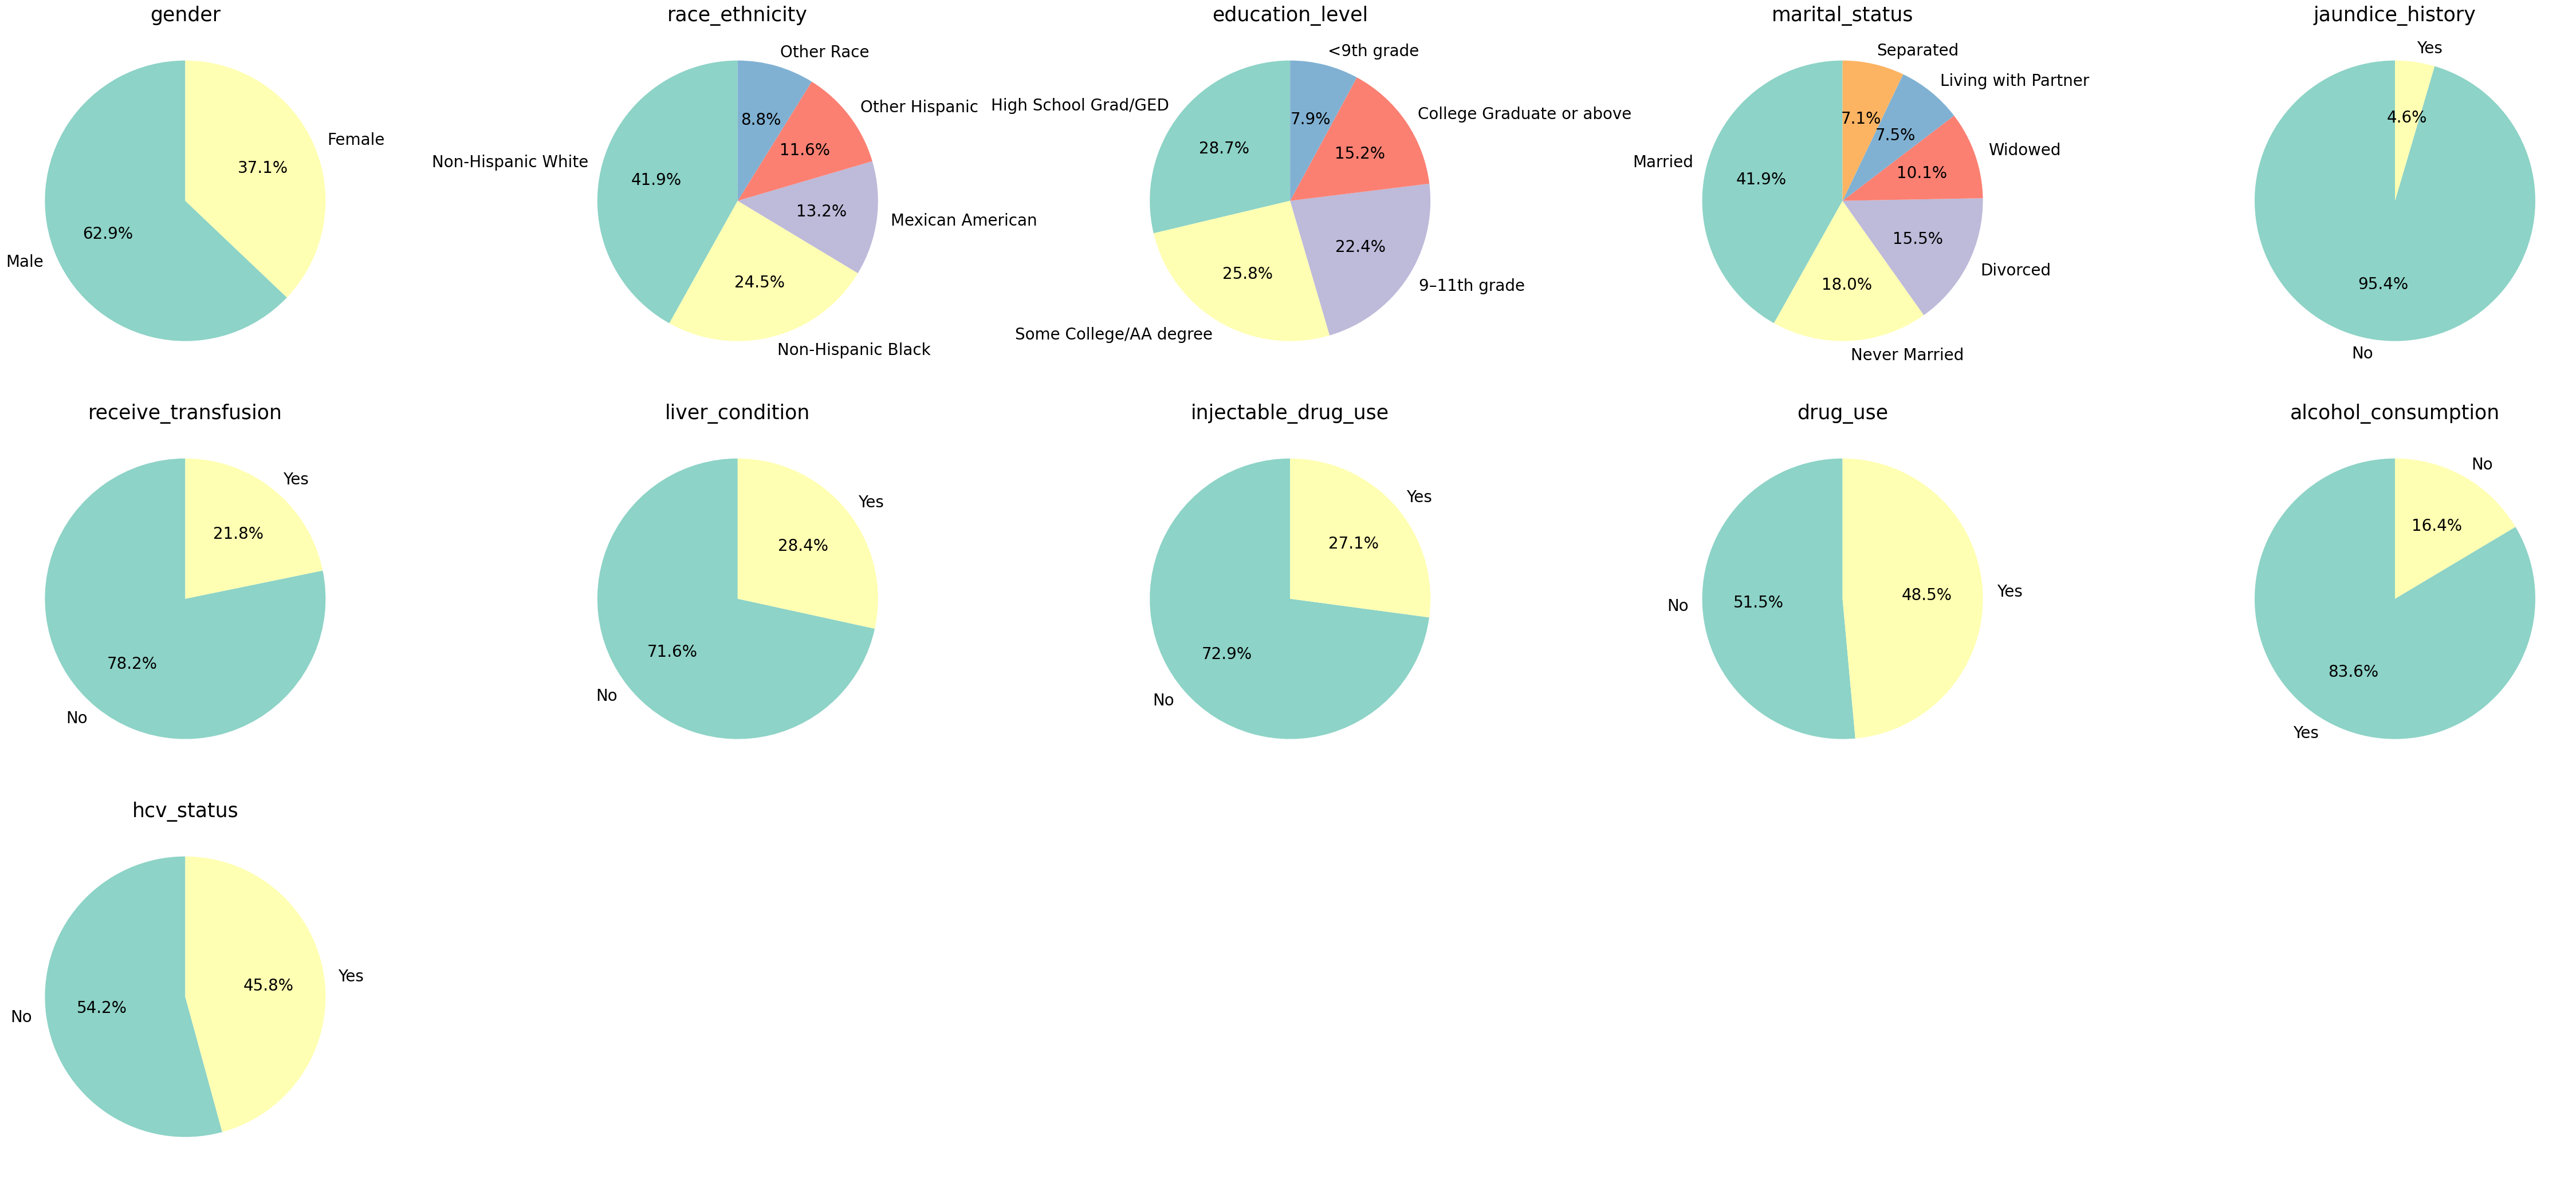

In [ ]:
import math
import matplotlib.pyplot as plt

# Jumlah kolom kategorikal
n_cols = len(cat_columns)

n_per_row = 5
n_rows = math.ceil(n_cols / n_per_row)

fig, axes = plt.subplots(n_rows, n_per_row, figsize=(n_per_row * 9, n_rows * 7))
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    data = df_cat[col].value_counts()
    color_count = len(data)
    colors = palette[:color_count]
    axes[i].pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        textprops={'fontsize': 20}
    )
    axes[i].set_title(col, fontsize=25)

for j in range(n_cols, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Data Distribution

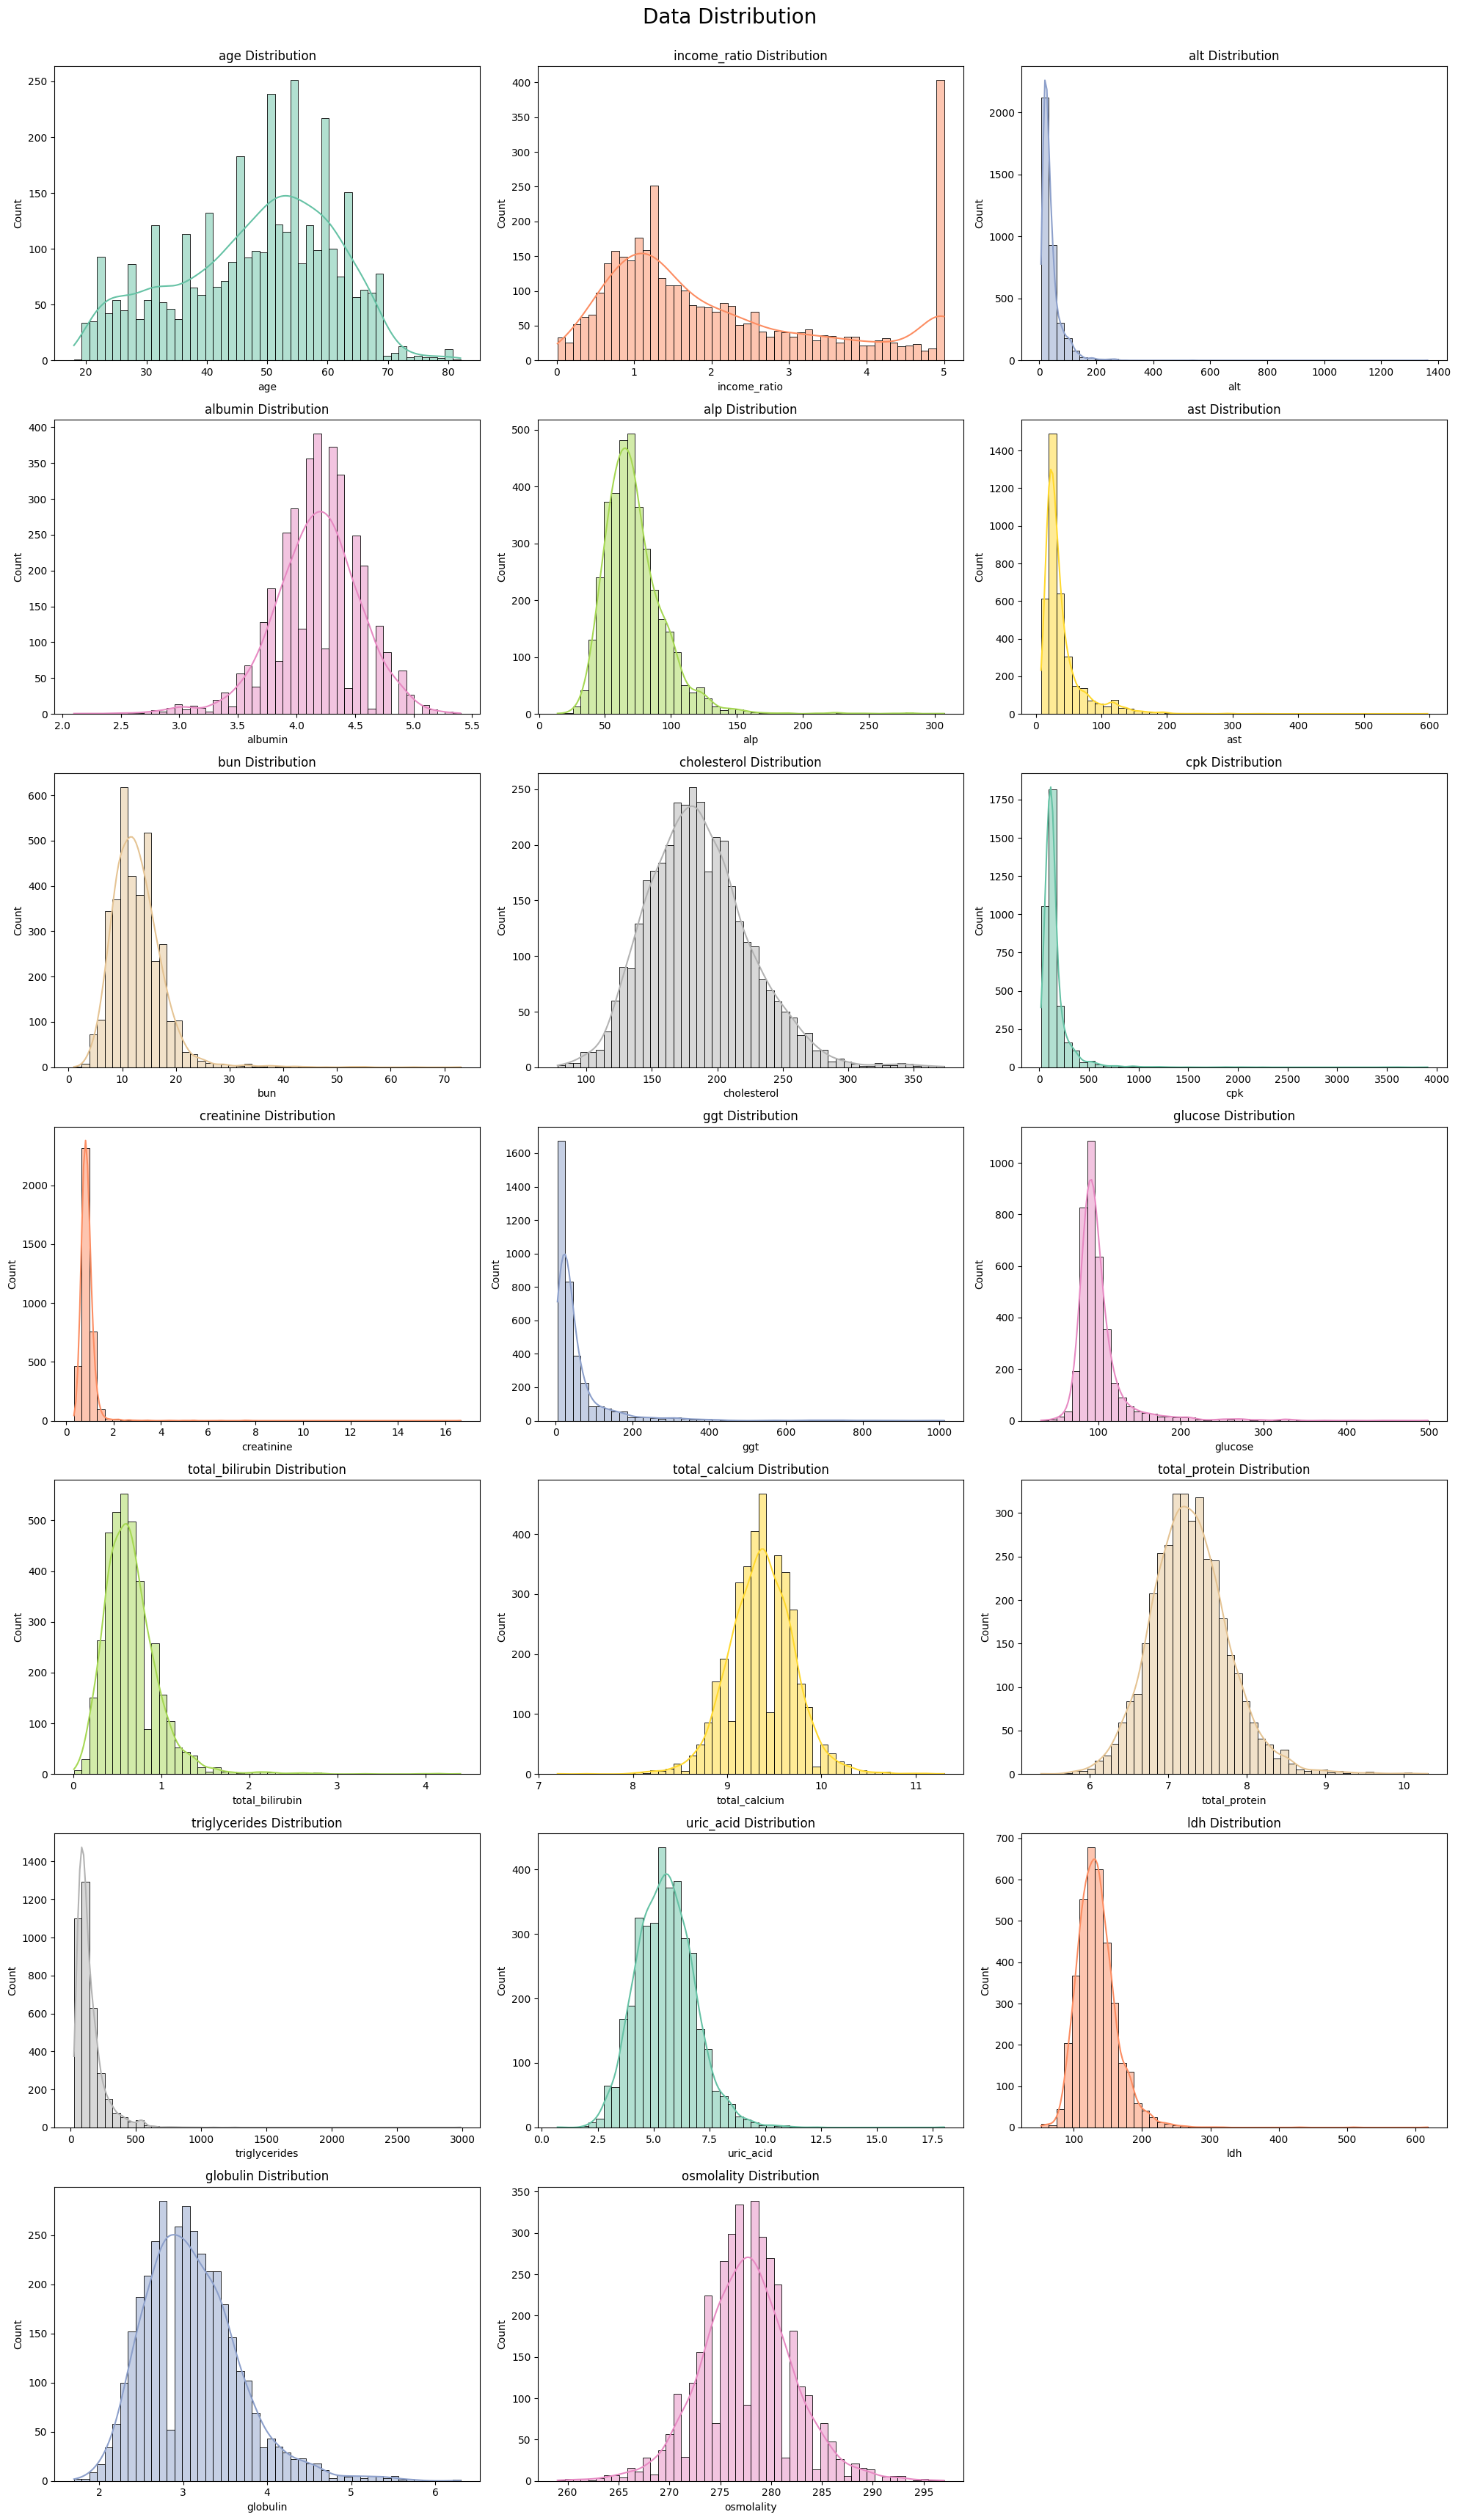

In [ ]:
import math

num_columns = ['age', 'income_ratio', 'alt', 'albumin', 'alp', 'ast', 'bun', 'cholesterol',
               'cpk', 'creatinine', 'ggt', 'glucose', 'total_bilirubin', 'total_calcium',
               'total_protein', 'triglycerides', 'uric_acid', 'ldh', 'globulin', 'osmolality']

cols = 3
rows = math.ceil(len(num_columns) / cols)  # otomatis hitung jumlah baris

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = np.ravel(axes)

colors = sns.color_palette("Set2", len(num_columns))

for i, col in enumerate(num_columns):
    sns.histplot(df[col], bins=50, kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hapus subplot kosong kalau ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Data Distribution", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


### Data Correlation

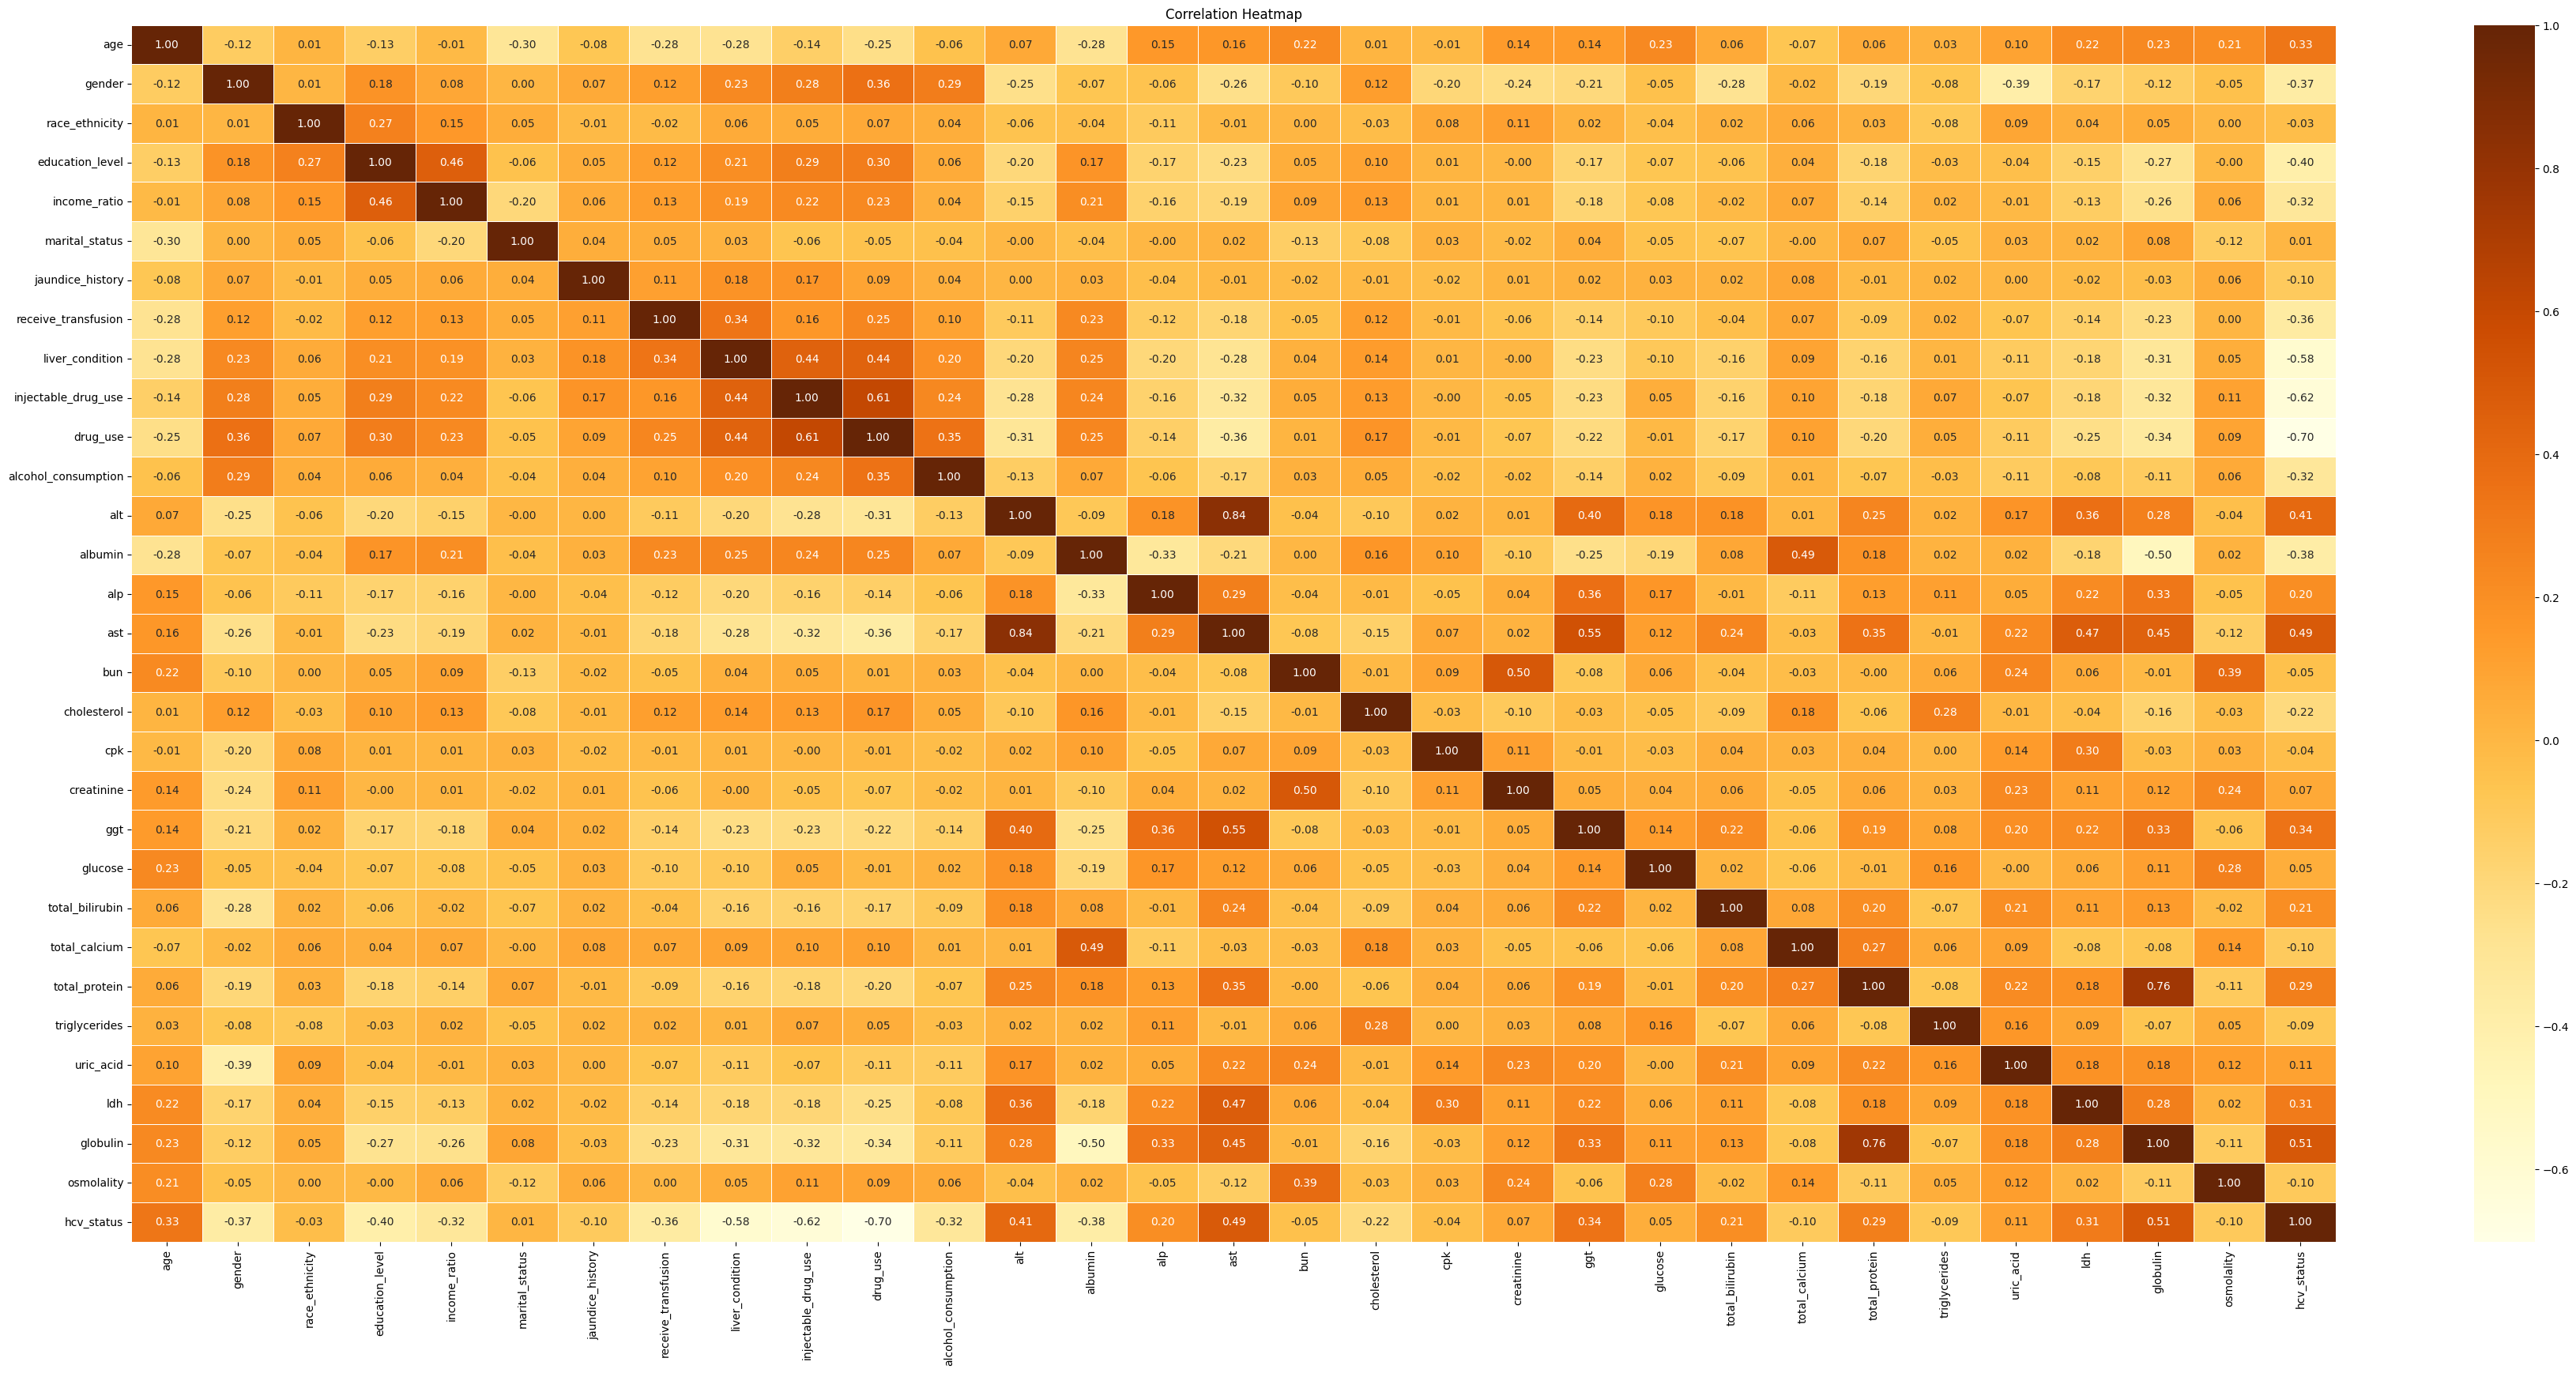

In [ ]:
plt.figure(figsize=(45, 20))
sns.heatmap(df.corr(), annot=True, cmap="YlOrBr", fmt=".2f", linewidths=0.5, linecolor="white")
plt.title("Correlation Heatmap")
plt.show()

### Numerical Features vs Target

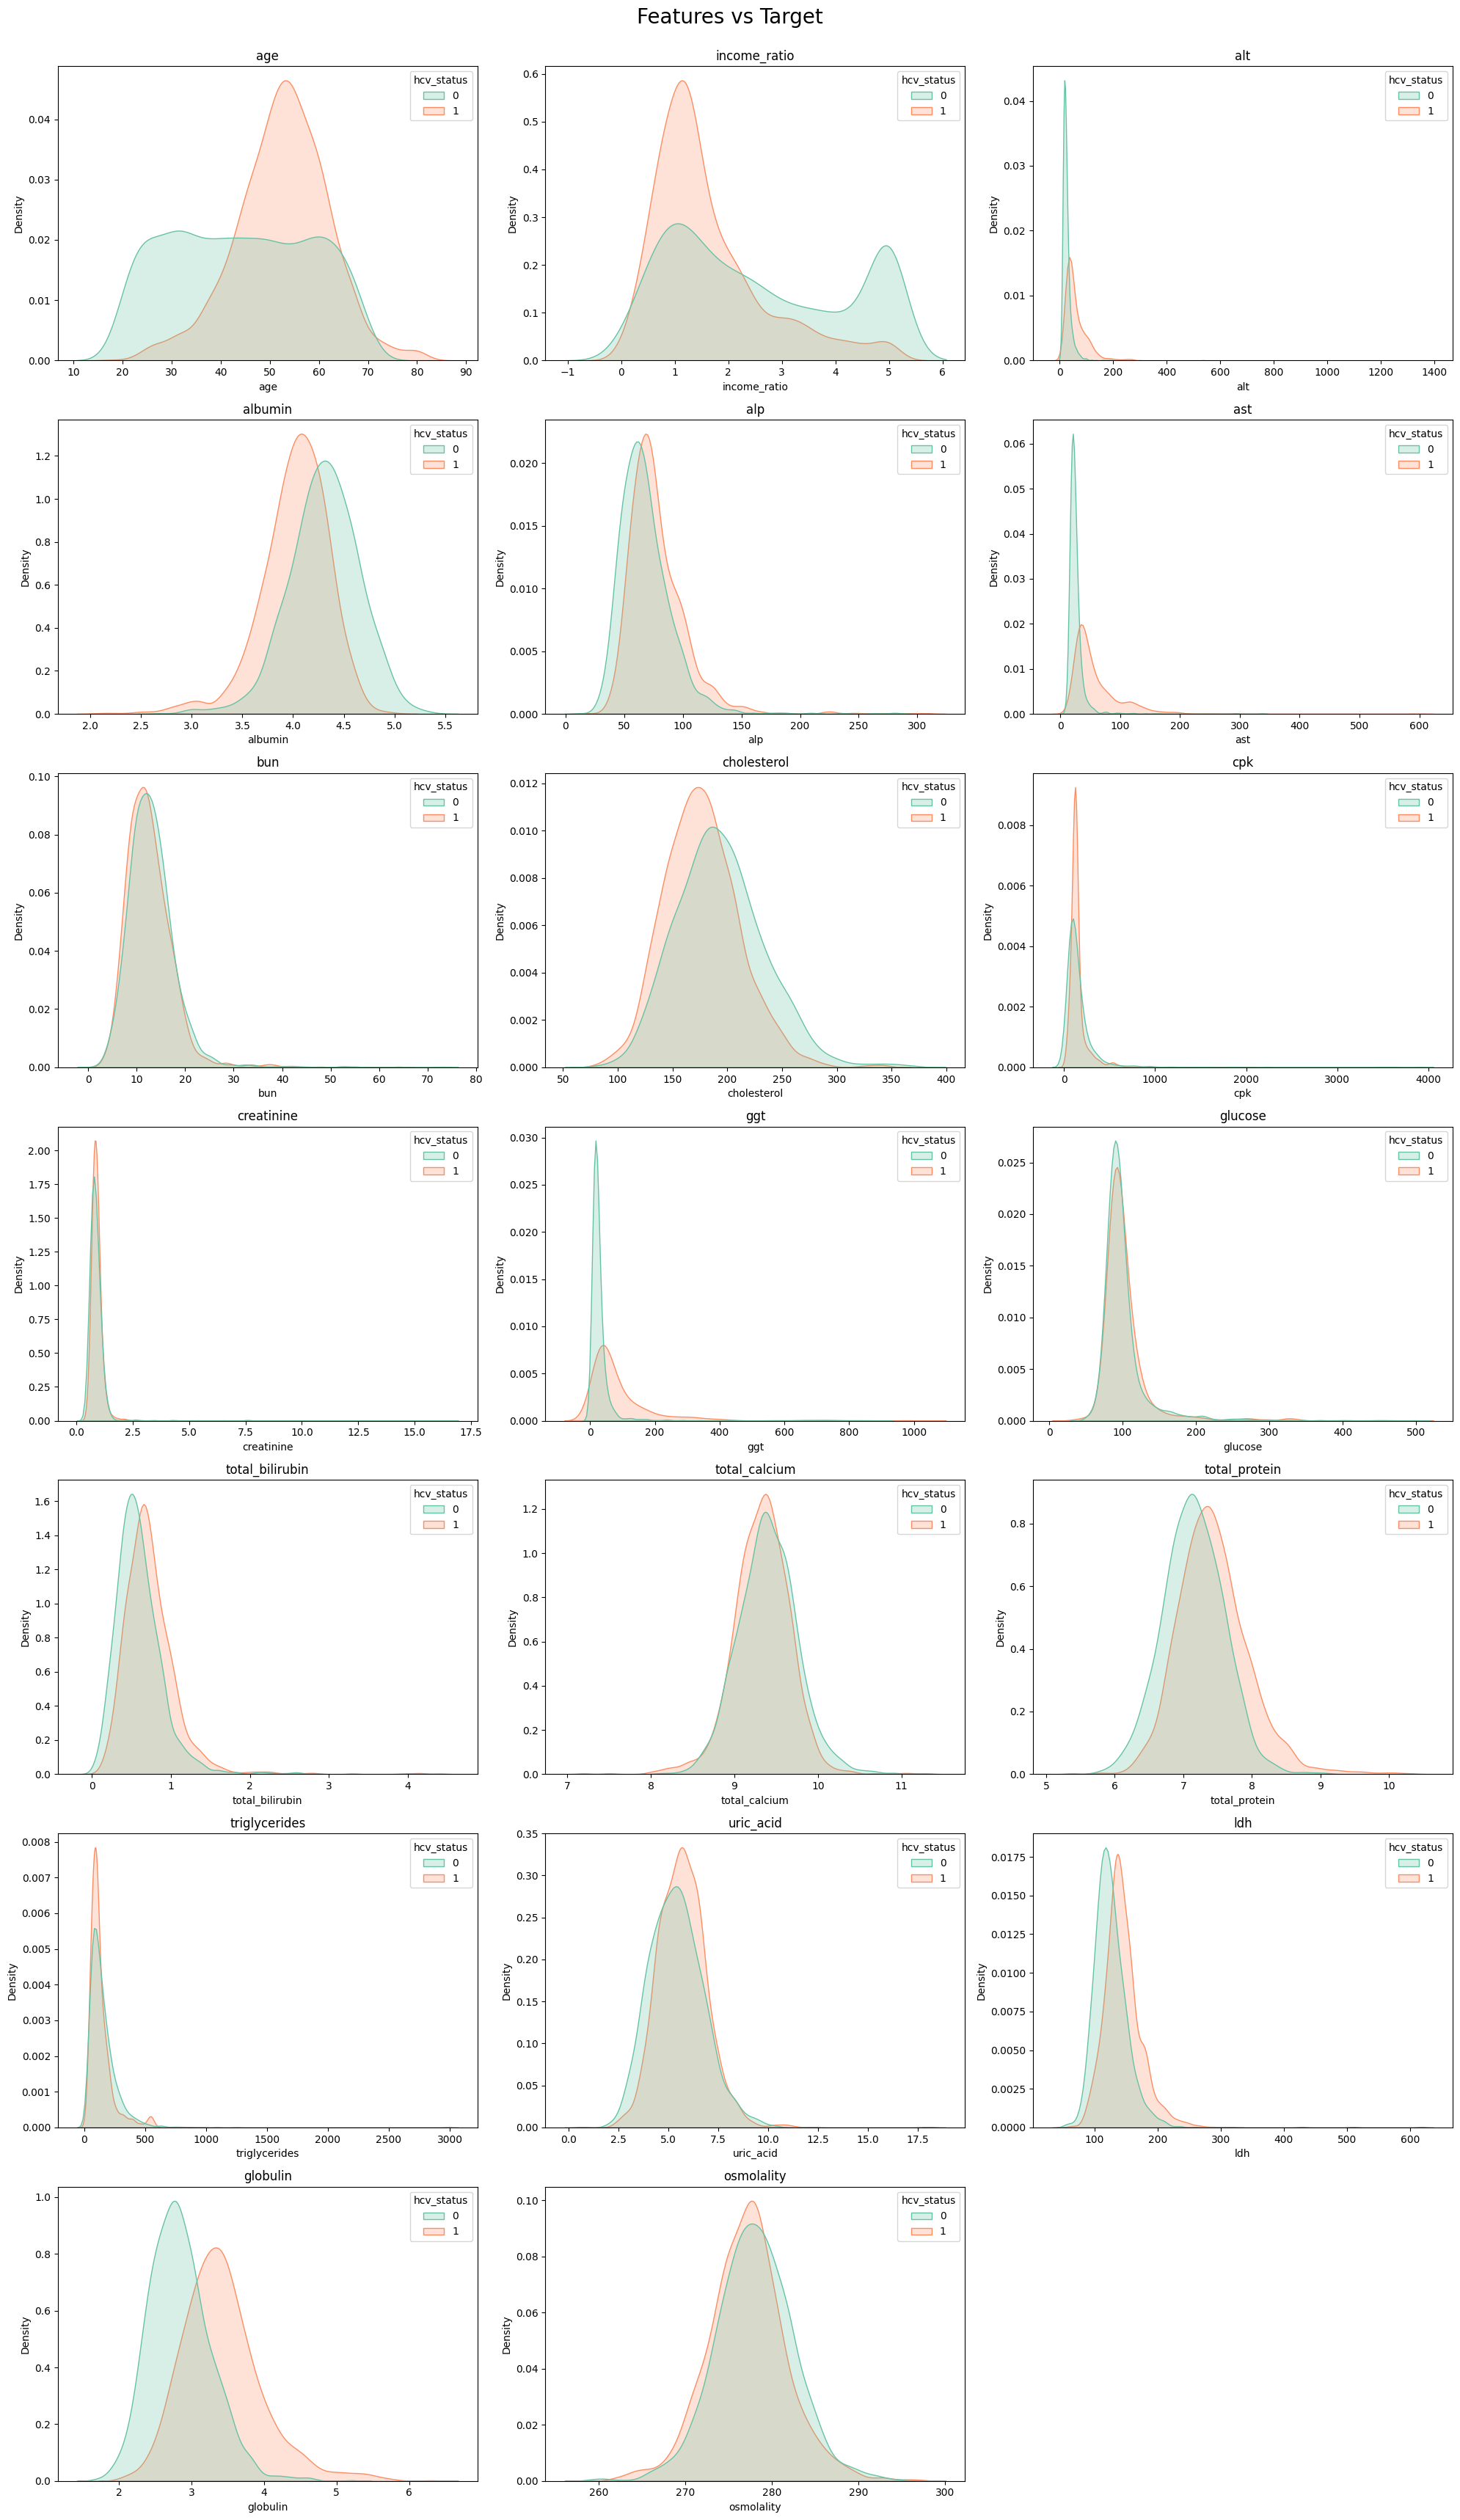

In [ ]:
import math

num_columns = df_num.columns  
target = "hcv_status"

cols = 3
rows = math.ceil(len(num_columns) / cols)  # otomatis hitung jumlah baris

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

colors = sns.color_palette("Set2", len(df[target].unique())) 

for i, col in enumerate(num_columns):
    sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False,
                palette=colors, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Features vs Target", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Categorical Feature Vs Target

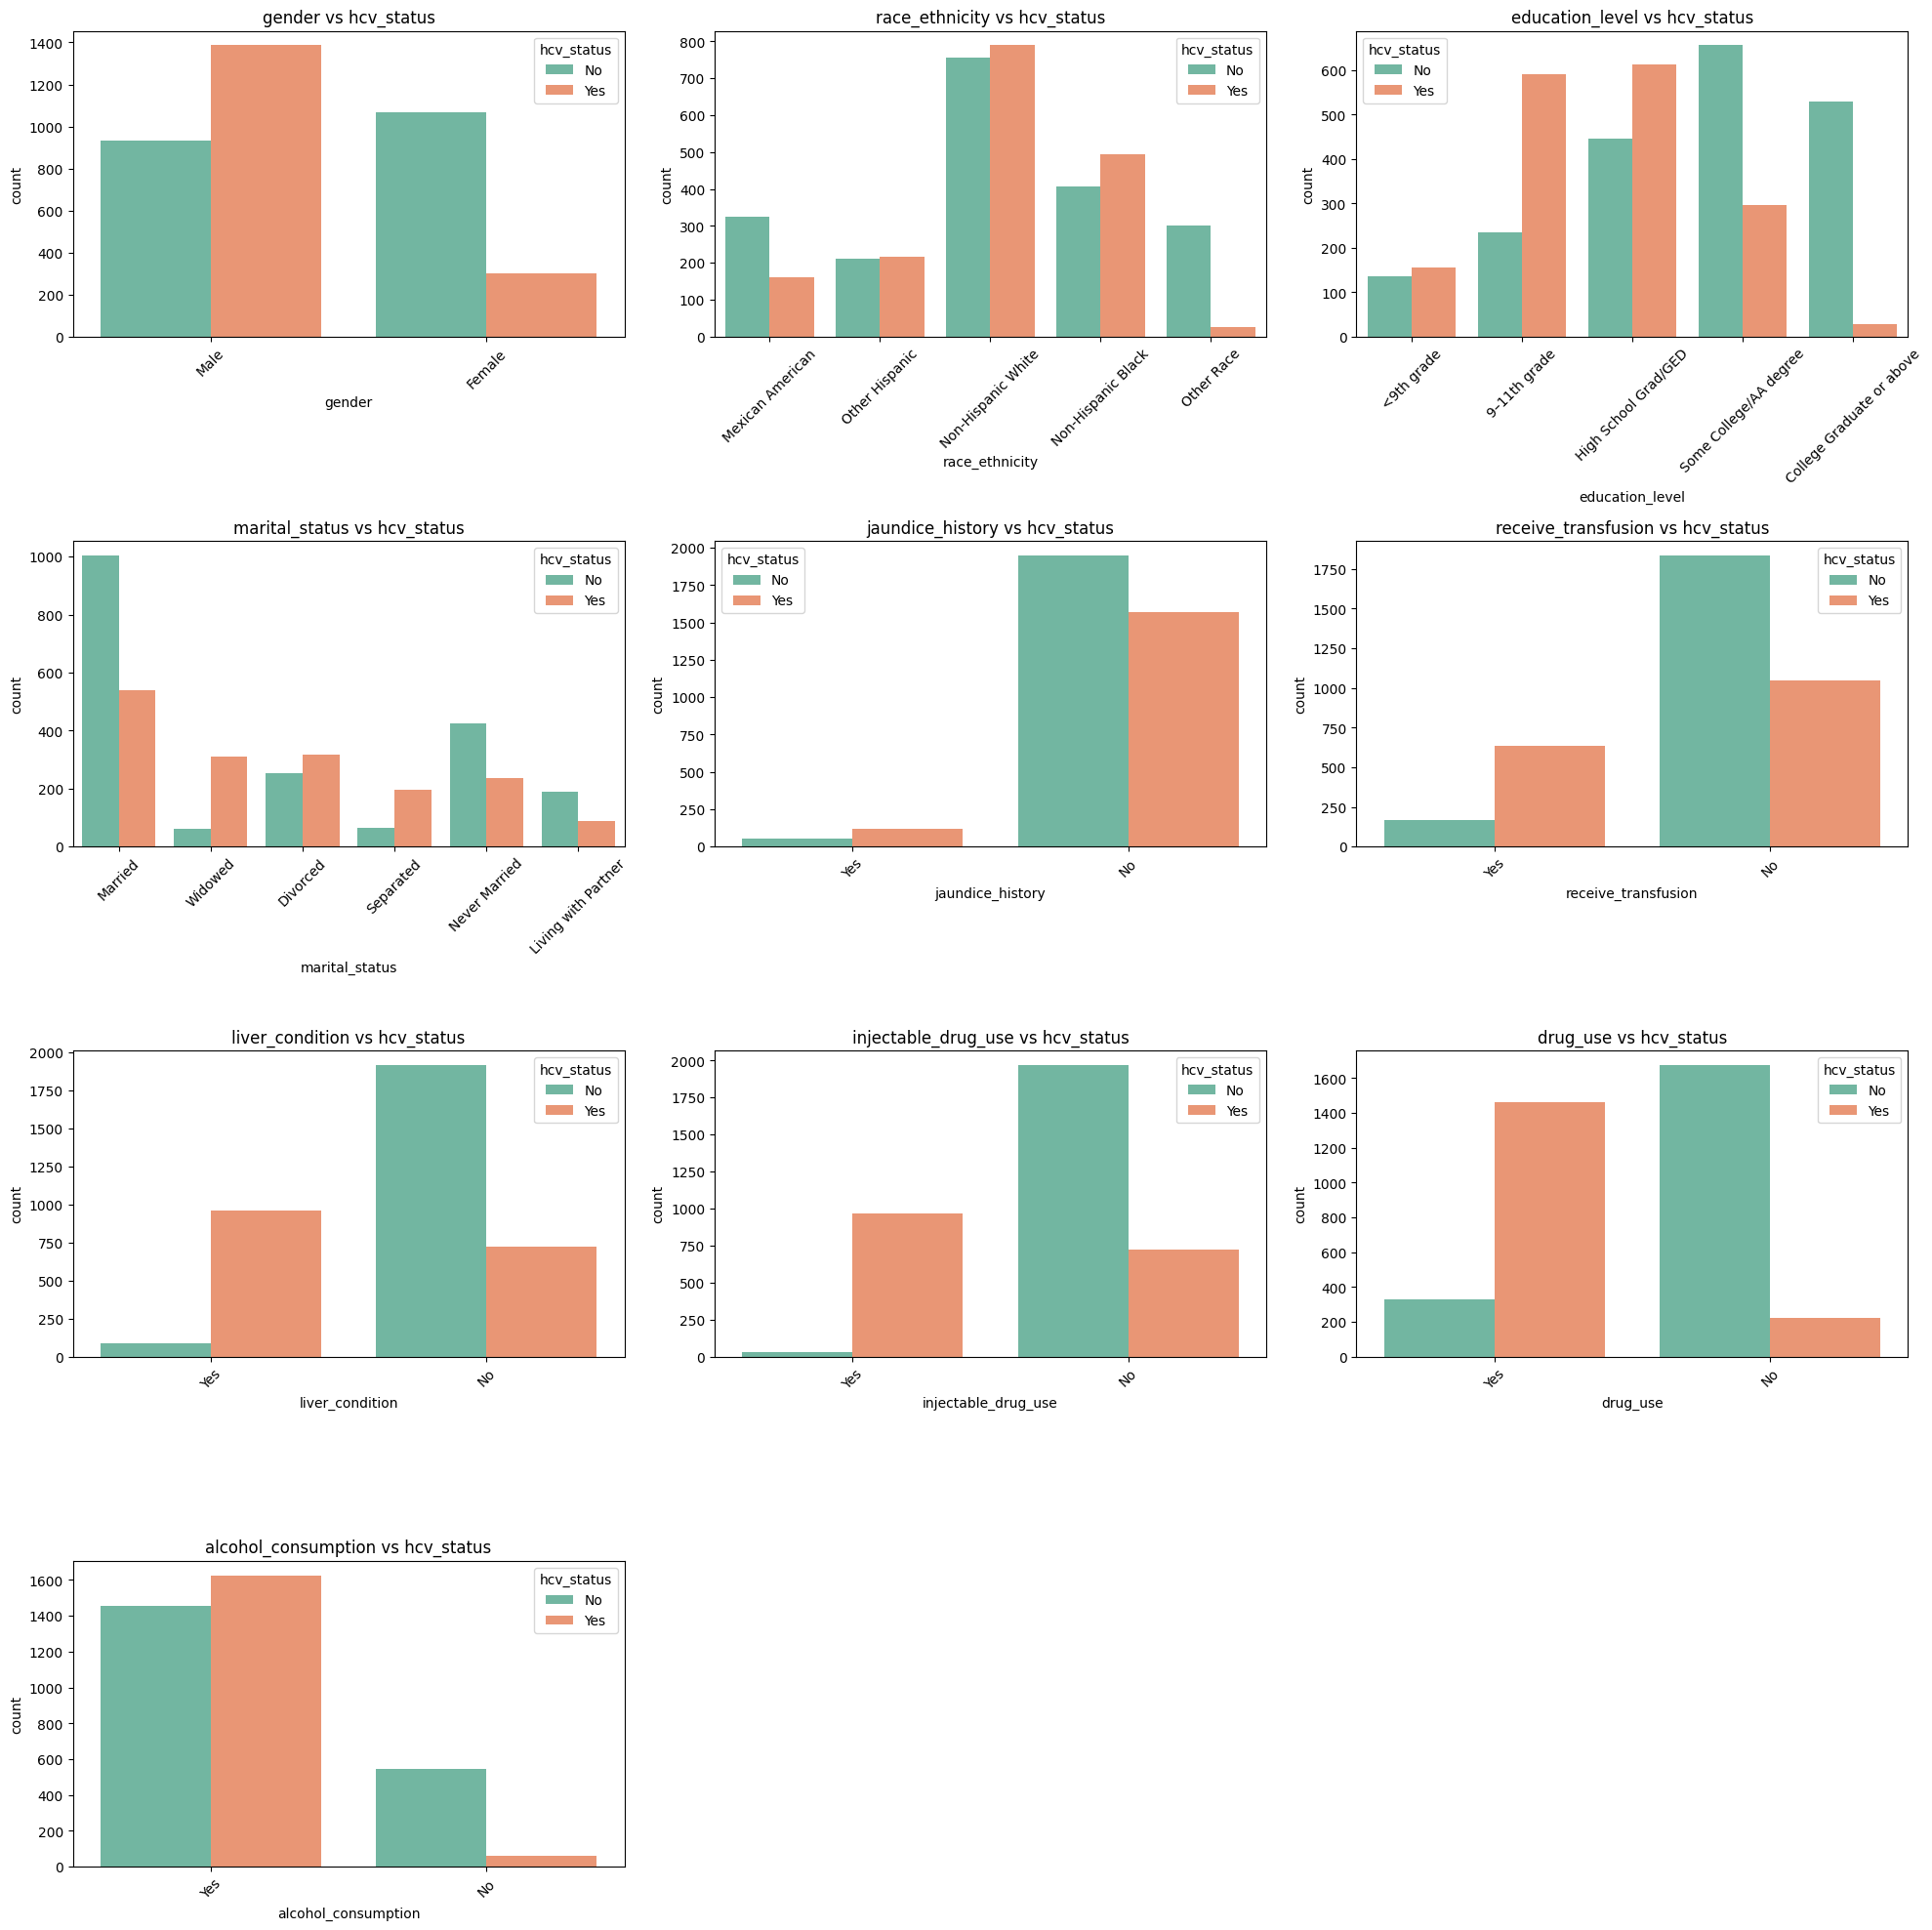

In [ ]:
cols = 3
rows = math.ceil(len(num_columns) / cols)  # otomatis hitung jumlah baris

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))

axes = axes.flatten()

for i, col in enumerate(cat_columns[:-1]):
    sns.countplot(data=df_cat, x=col, hue="hcv_status", palette=colors, ax=axes[i])
    axes[i].set_title(f"{col} vs hcv_status")
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Feature Importance

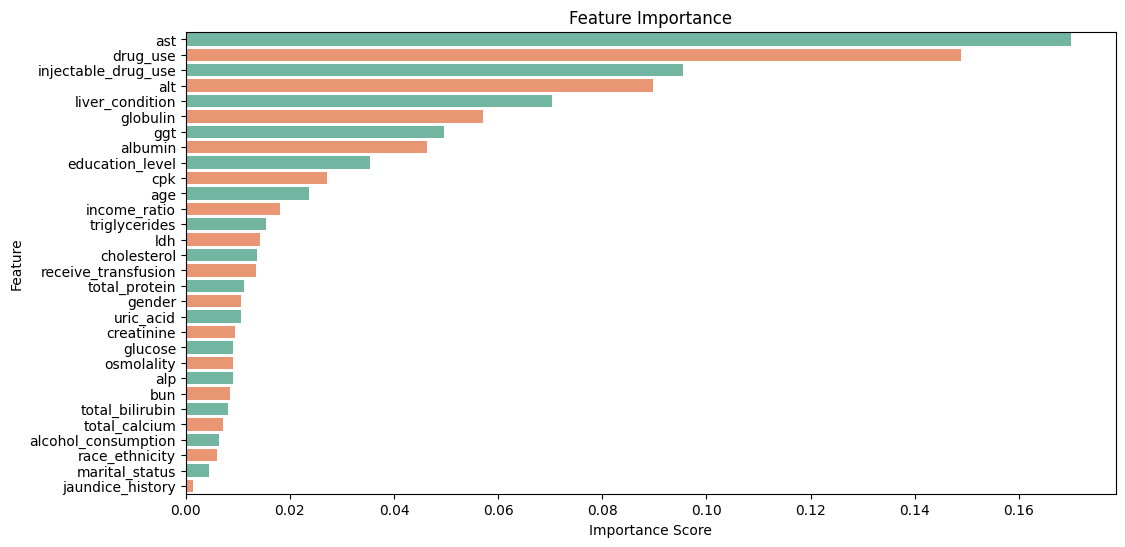

In [ ]:
X_train = df.drop(columns=["hcv_status"])
y_train = df["hcv_status"]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df,  palette=colors)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()